In [3]:
import numpy as np
TestPerf = np.load("Test_Performance_MNIST.npy")
ValError = np.load("Val_Acc_MNIST.npy")

In [4]:
this = np.sum(np.sum(TestPerf,axis=0),axis=0)
NumComplete = 0
while this[NumComplete] >0:
    NumComplete +=1
print(NumComplete)

5


In [5]:
TestPerf = TestPerf[:,:,0:NumComplete]
ValError = ValError[:,:,0:NumComplete]

In [6]:
TestPerf

array([[[0.3972376 , 0.3993912 , 0.40187186, 0.39658079, 0.4017987 ],
        [0.94989997, 0.94999999, 0.95020002, 0.94980001, 0.94950002]],

       [[0.38378239, 0.3817457 , 0.38170427, 0.3789815 , 0.38639626],
        [0.9684    , 0.96820003, 0.96880001, 0.96780002, 0.96829998]],

       [[0.37854633, 0.3801344 , 0.38217601, 0.37781537, 0.38246536],
        [0.96359998, 0.96100003, 0.96219999, 0.96240002, 0.96149999]]])

In [7]:
TestPerf_Mean = TestPerf.mean(axis=2)
TestPerf_StE = TestPerf.std(axis=2) / np.sqrt(NumComplete)

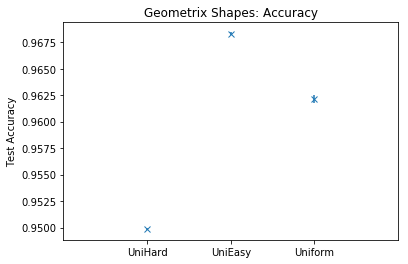

In [8]:
import matplotlib.pyplot as plt

flag = 1

labels = ['Hard','Easy','Uni']
plt.errorbar(np.array([1,2,3],dtype=int),TestPerf_Mean[:,flag],yerr = TestPerf_StE[:,flag],marker ='x',linestyle='none')
my_xticks = ['UniHard','UniEasy','Uniform']
plt.xticks(np.array([1,2,3],dtype=int), my_xticks)
thisplot = plt.gca()
thisplot.set_xlim(0,4)
if flag == 0:
    thisplot.set_title('Geometrix Shapes: Error')
    thisplot.set_ylabel('Test Cross-Entropy')
else:
    thisplot.set_title('Geometrix Shapes: Accuracy')
    thisplot.set_ylabel('Test Accuracy')

plt.show()

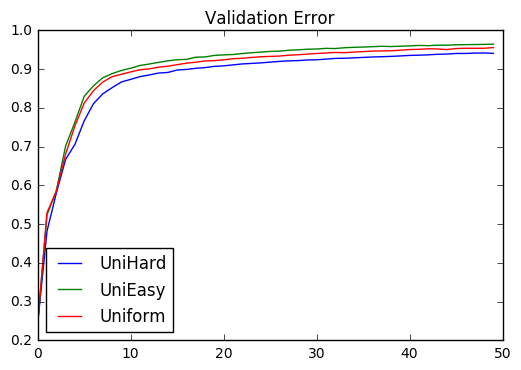

In [9]:
plt.plot(np.mean(ValError,axis=2))
plt.legend(['UniHard','UniEasy','Uniform'],loc='best')
thisplot = plt.gca()
thisplot.set_title('Validation Error')
plt.show()

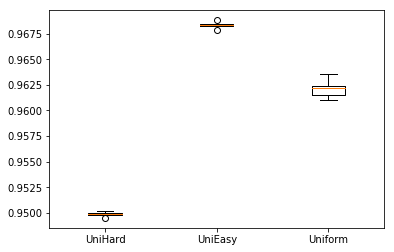

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = TestPerf[:,1,:]
ax.boxplot(data.T)
my_xticks = ['UniHard','UniEasy','Uniform']
plt.xticks(np.array([1,2,3],dtype=int), my_xticks)
plt.show()

In [8]:
from scipy.stats import ttest_rel

In [15]:
ttest_rel(TestPerf[1,flag],TestPerf[2,flag])

Ttest_relResult(statistic=-5.508920832193764, pvalue=5.537546086718904e-06)